1.0 Import Library

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

- NumPy (np): A Python package that provides functionality for doing numerical calculations.

- pandas (pd): A software library that enables users to manipulate and analyse data.

- Matplotlib.pyplot (plt): A Python package that enables the creation of static, animated, and interactive visualisations.

- sklearn.preprocessing.LabelEncoder: A tool that converts category information into numerical values.

- sklearn.preprocessing.StandardScaler: A tool used to standardise features by subtracting the mean and scaling to have a variance of one.

- sklearn.model_selection.train_test_split: Used to divide datasets into separate training and testing sets.

- imblearn.over_sampling.SMOTE: (Synthetic Minority Over-sampling Technique): A technique used to balance the class distribution in a dataset. It does this by producing synthetic samples specifically for the minority class.

- math.sqrt function: Used to compute the square root of a number.

- warnings module: To silence warning messages while the code is being executed.

2.0 Load the dataset

In [2]:
data = pd.read_csv('Rainfall_JPSTemerloh_2021_new.csv')
data1 = pd.read_csv('Rainfall_JPSTemerloh_2022_new.csv')

In [3]:
#make the 2021 data into one columns
newdata=data.melt('Day', value_name='Rainfall').drop('variable', axis=1)
print(newdata)

     Day Rainfall
0      1     26.0
1      2     36.0
2      3    125.0
3      4      3.5
4      5     36.0
..   ...      ...
367   27      0.0
368   28      0.0
369   29      0.0
370   30      2.0
371   31     29.0

[372 rows x 2 columns]


In [4]:
#make the 2022 data into one columns
newdata1=data1.melt('Day', value_name='Rainfall').drop('variable', axis=1)
print(newdata1)

     Day  Rainfall
0      1      44.5
1      2      25.0
2      3       0.5
3      4       8.0
4      5       0.5
..   ...       ...
367   27       0.0
368   28       0.0
369   29       0.0
370   30       0.0
371   31       0.0

[372 rows x 2 columns]


In [5]:
#Merge Rainfall Data
rainfalldata=pd.concat([newdata,newdata1], ignore_index=True)
print(rainfalldata)

     Day Rainfall
0      1     26.0
1      2     36.0
2      3    125.0
3      4      3.5
4      5     36.0
..   ...      ...
739   27      0.0
740   28      0.0
741   29      0.0
742   30      0.0
743   31      0.0

[744 rows x 2 columns]


In [6]:
data2 = pd.read_csv('WaterLevel_SgPahang_2021_new.csv')
data3 = pd.read_csv('WaterLevel_SgPahang_2022_new.csv')

In [7]:
#make the 2021 data into one columns
newdata2=data2.melt('Day', value_name='WaterLevel').drop('variable', axis=1)
print(newdata2)

     Day WaterLevel
0      1      25.52
1      2      27.71
2      3      28.95
3      4      31.84
4      5      33.13
..   ...        ...
367   27       26.6
368   28      26.12
369   29      25.78
370   30      25.37
371   31      25.56

[372 rows x 2 columns]


In [8]:
#make the 2022 data into one columns
newdata3=data3.melt('Day', value_name='WaterLevel').drop('variable', axis=1)
print(newdata3)

     Day  WaterLevel
0      1       28.65
1      2       30.70
2      3       31.39
3      4       31.35
4      5       30.19
..   ...         ...
367   27       25.96
368   28       25.67
369   29       25.47
370   30       25.32
371   31       25.18

[372 rows x 2 columns]


In [9]:
#Merge WaterLevel Data
waterleveldata=pd.concat([newdata2,newdata3], ignore_index=True)
print(waterleveldata)

     Day WaterLevel
0      1      25.52
1      2      27.71
2      3      28.95
3      4      31.84
4      5      33.13
..   ...        ...
739   27      25.96
740   28      25.67
741   29      25.47
742   30      25.32
743   31      25.18

[744 rows x 2 columns]


In [10]:
data4 = pd.read_csv('Streamflow_SgPahang_2021_new.csv')
data5 = pd.read_csv('Streamflow_SgPahang_2022_new.csv')

In [11]:
#make the 2021 data into one columns
newdata4=data4.melt('Day', value_name='StreamFlow').drop('variable', axis=1)
print(newdata4)

        Day  StreamFlow
0         1      719.41
1         2     2133.23
2         3     2999.71
3         4     4965.74
4         5     5845.11
..      ...         ...
391      29      849.70
392      30      644.58
393      31      745.48
394     NaN         NaN
395  Gap= 0         NaN

[396 rows x 2 columns]


In [12]:
#make the 2022 data into one columns
newdata5=data5.melt('Day', value_name='StreamFlow').drop('variable', axis=1)
print(newdata5)

        Day  StreamFlow
0         1     2792.38
1         2     4204.10
2         3     4660.11
3         4     4634.53
4         5     3856.88
..      ...         ...
391      29      688.34
392      30      621.39
393      31      555.18
394     NaN         NaN
395  Gap= 0         NaN

[396 rows x 2 columns]


In [13]:
#Merge StreamFlow Data
streamflowdata=pd.concat([newdata4,newdata5], ignore_index=True)
print(streamflowdata)

        Day  StreamFlow
0         1      719.41
1         2     2133.23
2         3     2999.71
3         4     4965.74
4         5     5845.11
..      ...         ...
787      29      688.34
788      30      621.39
789      31      555.18
790     NaN         NaN
791  Gap= 0         NaN

[792 rows x 2 columns]


In [14]:
data6 = pd.read_csv('Weather_Temerloh_Celcius_2021.csv')
data7 = pd.read_csv('Weather_Temerloh_Celcius_2022.csv')

In [15]:
#make the 2021 data into one columns
newdata6=data6.melt('Day', value_name='Weather').drop('variable', axis=1)
print(newdata6)

     Day    Weather
0      1  24.611111
1      2  24.333333
2      3  23.055556
3      4  23.388889
4      5  25.611111
..   ...        ...
367   27  27.055556
368   28  26.777778
369   29  26.722222
370   30  24.611111
371   31  25.666667

[372 rows x 2 columns]


In [16]:
#make the 2022 data into one columns
newdata7=data7.melt('Day', value_name='Weather').drop('variable', axis=1)
print(newdata7)

     Day    Weather
0      1  25.444444
1      2  24.611111
2      3  25.055556
3      4  25.444444
4      5  27.000000
..   ...        ...
367   27  25.055556
368   28  25.722222
369   29  24.333333
370   30  26.444444
371   31  26.222222

[372 rows x 2 columns]


In [17]:
#Merge Weather Data
weatherdata=pd.concat([newdata6,newdata7], ignore_index=True)
print(weatherdata)

     Day    Weather
0      1  24.611111
1      2  24.333333
2      3  23.055556
3      4  23.388889
4      5  25.611111
..   ...        ...
739   27  25.055556
740   28  25.722222
741   29  24.333333
742   30  26.444444
743   31  26.222222

[744 rows x 2 columns]


In [18]:
#Merge All Data
waterleveldata1=waterleveldata.drop(columns=['Day'])
streamflowdata1=streamflowdata.drop(columns=['Day'])
weatherdata1=weatherdata.drop(columns=['Day'])
alldata=pd.concat([rainfalldata,waterleveldata1,streamflowdata1,weatherdata1], axis=1)
print(alldata)

     Day Rainfall WaterLevel  StreamFlow    Weather
0    1.0     26.0      25.52      719.41  24.611111
1    2.0     36.0      27.71     2133.23  24.333333
2    3.0    125.0      28.95     2999.71  23.055556
3    4.0      3.5      31.84     4965.74  23.388889
4    5.0     36.0      33.13     5845.11  25.611111
..   ...      ...        ...         ...        ...
787  NaN      NaN        NaN      688.34        NaN
788  NaN      NaN        NaN      621.39        NaN
789  NaN      NaN        NaN      555.18        NaN
790  NaN      NaN        NaN         NaN        NaN
791  NaN      NaN        NaN         NaN        NaN

[792 rows x 5 columns]


3.0 Data Preprocessing

In [19]:
# Check for null data
alldata.isnull().sum()

Day           48
Rainfall      62
WaterLevel    62
StreamFlow    62
Weather       62
dtype: int64

In [20]:
alldata[pd.isnull(alldata).any(axis=1)]

,Day,Rainfall,WaterLevel,StreamFlow,Weather
31,1.0,20.5,25.08,NaN,25.555556
32,2.0,0.0,25.14,NaN,26.055556
59,29.0,NaN,NaN,185.15,NaN
60,30.0,NaN,NaN,176.92,NaN
61,31.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
787,NaN,NaN,NaN,688.34,NaN
788,NaN,NaN,NaN,621.39,NaN
789,NaN,NaN,NaN,555.18,NaN
790,NaN,NaN,NaN,NaN,NaN


Actually, there is not necessary all considered as missing data, since every month has a different number of days and it will detects as missing data.

In [21]:
#Drop wrong day row missing data
alldata.dropna(subset = ['Weather'], inplace=True)
alldata[pd.isnull(alldata).any(axis=1)]

,Day,Rainfall,WaterLevel,StreamFlow,Weather
31,1.0,20.5,25.08,NaN,25.555556
32,2.0,0.0,25.14,NaN,26.055556
62,1.0,0.0,?,NaN,27.444444
63,2.0,0.0,24.1,NaN,27.055556
64,3.0,0.0,24.15,NaN,27.222222
65,4.0,2.0,24.05,NaN,27.500000
97,5.0,2.0,24.6,NaN,26.555556
98,6.0,0.0,24.53,NaN,27.555556
129,6.0,0.5,25.13,NaN,26.833333
130,7.0,0.0,25.25,NaN,27.388889


In [22]:
#WaterLevel Interpolation
#Merge Feb available data & March first 9 days data for interpolation
FebDay=alldata.iloc[31:40, 0]
MarDay=alldata.iloc[60:68,0]

daydata=pd.concat([FebDay,MarDay], ignore_index=True)
print(daydata)

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9     2.0
10    3.0
11    4.0
12    5.0
13    6.0
14    7.0
15    8.0
16    9.0
Name: Day, dtype: float64


In [23]:
#Merge Feb available data & March first 9 days data for interpolation
FebWaterLevel=alldata.iloc[31:40, 2]
MarWaterLevel=alldata.iloc[60:68,2]
#print(MarDay)
interpolatedata=pd.concat([FebWaterLevel,MarWaterLevel], ignore_index=True)
print(interpolatedata)

0     25.08
1     25.14
2     25.25
3     25.12
4     24.93
5     24.78
6     24.71
7     24.69
8     24.67
9      24.1
10    24.15
11    24.05
12    23.99
13    23.95
14       24
15    24.07
16    23.99
Name: WaterLevel, dtype: object


In [24]:
#Linear Interpolation for missing value in Water Level
import scipy.interpolate

x=daydata
y=interpolatedata
y_interp = scipy.interpolate.interp1d(x, y)

#find y-value associated with x-value of 8.5 which is in between February and March data
print(y_interp(8.5))

24.37


In [25]:
#Replace missing data with Linear Interpolation value
alldata.iloc[40:60, 2] = y_interp(8.5)
print(alldata.iloc[40:60, 2])

40    24.37
41    24.37
42    24.37
43    24.37
44    24.37
45    24.37
46    24.37
47    24.37
48    24.37
49    24.37
50    24.37
51    24.37
52    24.37
53    24.37
54    24.37
55    24.37
56    24.37
57    24.37
58    24.37
62    24.37
Name: WaterLevel, dtype: object


In [26]:
#Use this mask to filter and detect the question mark symbol (?)
def contains_question_mark(cell):
    return '?' in str(cell)

# Apply the function to the entire DataFrame
mask = alldata.applymap(contains_question_mark)

In [27]:
rows_with_question_mark = alldata[mask.any(axis=1)]
rows_with_question_mark

,Day,Rainfall,WaterLevel,StreamFlow,Weather
289,11.0,?,23.72,166.59,28.833333


In [28]:
count_question_marks = mask.values.sum()
count_question_marks

1

In [29]:
alldata.replace('?', np.nan, inplace=True)

In [30]:
#Replace missing rainfall data with 0
alldata.fillna(0, inplace = True)

In [31]:
#Recheck for missing value
alldata.isnull().sum()

Day           0
Rainfall      0
WaterLevel    0
StreamFlow    0
Weather       0
dtype: int64

In [32]:
#export the complete dataset to csv
alldata.to_csv('AllData.csv', index=False)

In [33]:
# Import the complete dataset
newdata = pd.read_csv('AllData.csv')

In [34]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         730 non-null    float64
 1   Rainfall    730 non-null    float64
 2   WaterLevel  730 non-null    float64
 3   StreamFlow  730 non-null    float64
 4   Weather     730 non-null    float64
dtypes: float64(5)
memory usage: 28.6 KB


In [35]:
# Define the threshold levels based on your domain knowledge
thresholds = [26.00, 29.00, 31.00]

# Function to classify water levels into thresholds
def classify_water_level(water_level):
    if water_level < thresholds[0]:
        return 'normal'
    elif thresholds[0] <= water_level < thresholds[1]:
        return 'alert'
    elif thresholds[1] <= water_level < thresholds[2]:
        return 'warning'
    else:
        return 'danger'

# Add a new column with the threshold labels
newdata['Threshold'] = newdata['WaterLevel'].apply(classify_water_level)

Since this research is about classification, so need to classify the water level by certain ranges to represent the normal, alert, warning and danger.

In [36]:
newdata

,Day,Rainfall,WaterLevel,StreamFlow,Weather,Threshold
0,1.0,26.0,25.52,719.41,24.611111,normal
1,2.0,36.0,27.71,2133.23,24.333333,alert
2,3.0,125.0,28.95,2999.71,23.055556,alert
3,4.0,3.5,31.84,4965.74,23.388889,danger
4,5.0,36.0,33.13,5845.11,25.611111,danger
...,...,...,...,...,...,...
725,27.0,0.0,25.96,755.32,25.055556,normal
726,28.0,0.0,25.67,712.40,25.722222,normal
727,29.0,0.0,25.47,699.56,24.333333,normal
728,30.0,0.0,25.32,789.36,26.444444,normal


In [37]:
#Describe the data
newdata.describe()

,Day,Rainfall,WaterLevel,StreamFlow,Weather
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,6.372603,25.188726,618.798493,27.051522
std,8.802278,15.945107,1.684204,977.532332,1.211477
min,1.000000,0.000000,23.330000,0.000000,23.055556
25%,8.000000,0.000000,24.192500,163.455000,26.277778
50%,16.000000,0.000000,24.720000,329.070000,27.166667
75%,23.000000,5.500000,25.677500,685.850000,27.944444
max,31.000000,165.000000,34.590000,6977.240000,29.888889


4.0 Data Observation & Visualization

In [38]:
# Label Encoding
lab = LabelEncoder()
newdata['Threshold'] = lab.fit_transform(newdata['Threshold'])

In [39]:
#Normalize value
from sklearn import preprocessing
d = preprocessing.normalize(newdata)
scaled_df = pd.DataFrame(d, columns=newdata.columns)
print(scaled_df)

          Day  Rainfall  WaterLevel  StreamFlow   Weather  Threshold
0    0.001387  0.036073    0.035407    0.998133  0.034146   0.002775
1    0.000937  0.016871    0.012986    0.999708  0.011403   0.000000
2    0.000999  0.041631    0.009642    0.999057  0.007679   0.000000
3    0.000805  0.000705    0.006412    0.999968  0.004710   0.000201
4    0.000855  0.006159    0.005668    0.999955  0.004381   0.000171
..        ...       ...         ...         ...       ...        ...
725  0.035683  0.000000    0.034308    0.998222  0.033113   0.002643
726  0.039222  0.000000    0.035959    0.997929  0.036032   0.002802
727  0.041367  0.000000    0.036331    0.997876  0.034710   0.002853
728  0.037937  0.000000    0.032019    0.998204  0.033441   0.002529
729  0.022655  0.000000    0.018402    0.999389  0.019163   0.001462

[730 rows x 6 columns]


In [40]:
newdata.corr()

,Day,Rainfall,WaterLevel,StreamFlow,Weather,Threshold
Day,1.000000,-0.072206,-0.040299,-0.020397,0.064462,0.019794
Rainfall,-0.072206,1.000000,0.139586,0.025883,-0.135205,-0.039510
WaterLevel,-0.040299,0.139586,1.000000,0.417328,-0.405941,-0.519297
StreamFlow,-0.020397,0.025883,0.417328,1.000000,-0.243720,-0.118819
Weather,0.064462,-0.135205,-0.405941,-0.243720,1.000000,0.260540
Threshold,0.019794,-0.039510,-0.519297,-0.118819,0.260540,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

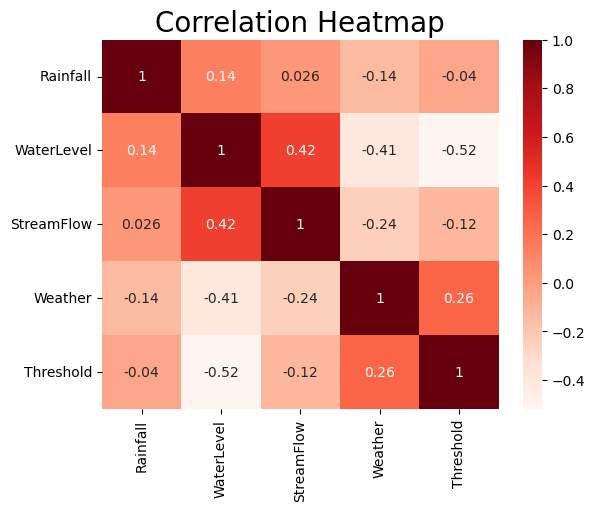

In [41]:
# see correlation between variables through a correlation heatmap
import seaborn as sns

#drop 'Day'
newdata1=newdata.drop(columns=['Day'],axis=1)

corr = newdata1.corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

From the correlation heatmap, Streamflow has slight strong relation with Water Level (0.42).

While Threshold and Weather has slight strong negative relation with Water Level -0.52 and -0.41 respectively

5.0 Assign input and output variables

In [42]:
# Assign feature and target
X = newdata[['Rainfall', 'StreamFlow', 'Weather']]
y_regression = newdata1['WaterLevel']
y_classification = newdata1['Threshold']

The feature and target variables are essential elements of the training data that the model utilises to acquire patterns and provide predictions.

The feature variables (X) are 'Rainfall', 'StreamFlow' and 'Weather', while the target variable for regression (y_regression) is 'WaterLevel'. Meanwhile, the target variable for classification (y_classification) represents the 'Threshold' labels, including 'normal', 'alert', 'warning' and 'danger' based on the water level.

6.0 Split data for train & test

In [43]:
# Split the data into training and testing sets

X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_regression, y_classification, test_size=0.2, random_state=42)

For data partitioning, the dataset is split into 20% for testing and the remaining 80% for training.

In [44]:
# Count occurrences in training set
class_counts_train = y_class_train.value_counts()

# Count occurrences in testing set
class_counts_test = y_class_test.value_counts()

# Display the counts
print("Class counts in training set:")
print(class_counts_train)

print("\nClass counts in testing set:")
print(class_counts_test)

Class counts in training set:
Threshold
2    476
0     90
1     12
3      6
Name: count, dtype: int64

Class counts in testing set:
Threshold
2    117
0     23
1      5
3      1
Name: count, dtype: int64


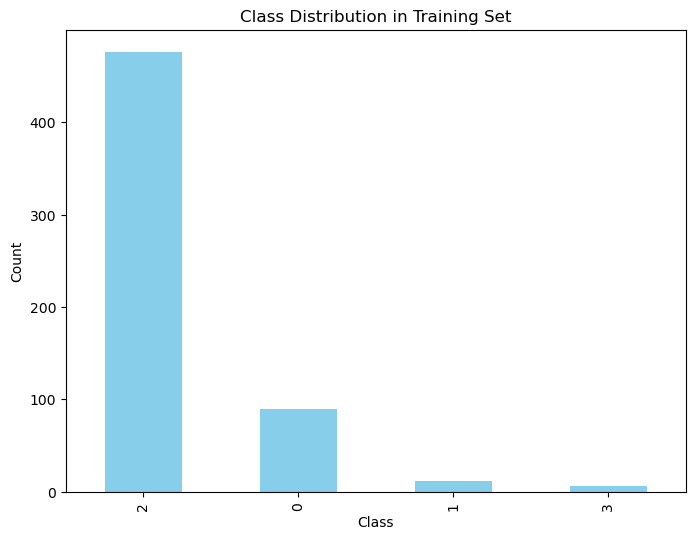

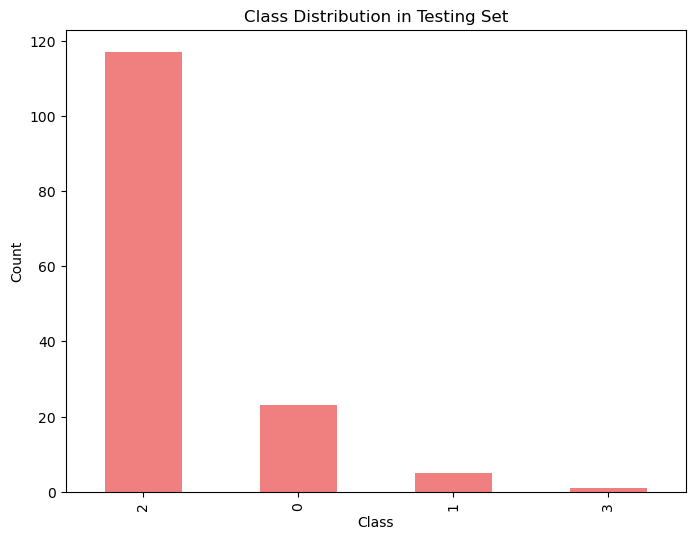

In [45]:
# Visualize class distribution for the training set
plt.figure(figsize=(8, 6))
class_counts_train.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize class distribution for the testing set
plt.figure(figsize=(8, 6))
class_counts_test.plot(kind='bar', color='lightcoral')
plt.title('Class Distribution in Testing Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Combine oversampling and undersampling to balance the classes
oversampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X_train, y_class_train)
X_balanced, y_balanced = undersampler.fit_resample(X_resampled, y_resampled)

# Display the new class distribution
print("Balanced class counts:")
print(pd.Series(y_balanced).value_counts())

Balanced class counts:
Threshold
0    476
1    476
2    476
3    476
Name: count, dtype: int64


In [47]:
# Feature Scaling
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

Feature scaling is significant to get better performance of machine learning models. Better machine learning may be distinguished from weaker machine learning via scaling. Standard scalar standardizes the features by eliminating the mean and scaling to unit variance. It also known as Z-score normalisation. It aims to convert the data into a standard normal distribution (with a mean of 0 and a standard deviation of 1).

In [48]:
# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
y_class_train_encoded = label_encoder.fit_transform(y_class_train)

# Transform the target variable in the test set
y_class_test_encoded = label_encoder.transform(y_class_test)

Label encoder is used to convert the categorical labels such as 'normal', 'alert', 'warning', and 'danger' into numerical labels.

7.0 Model

## Decision Tree (Classification)

In [49]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_classifier = DecisionTreeClassifier()

In [50]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
grid_search = GridSearchCV(estimator = decision_tree_classifier, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [52]:
# Fit the grid search to the data
grid_search.fit(X_train_scale, y_class_train_encoded)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [53]:
# Get the best parameters and the best estimator (model)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [54]:
# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_scale)

# Display the classification report
from sklearn.metrics import classification_report, accuracy_score

print("\nClassification Report on Test Set:")
print(classification_report(y_class_test_encoded, y_pred_test))

# Display the accuracy on the test set
accuracy = accuracy_score(y_class_test_encoded, y_pred_test)
print("\nAccuracy on Test Set:", accuracy)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.46      0.26      0.33        23
           1       1.00      0.20      0.33         5
           2       0.85      0.96      0.90       117
           3       0.00      0.00      0.00         1

    accuracy                           0.82       146
   macro avg       0.58      0.35      0.39       146
weighted avg       0.79      0.82      0.78       146


Accuracy on Test Set: 0.815068493150685


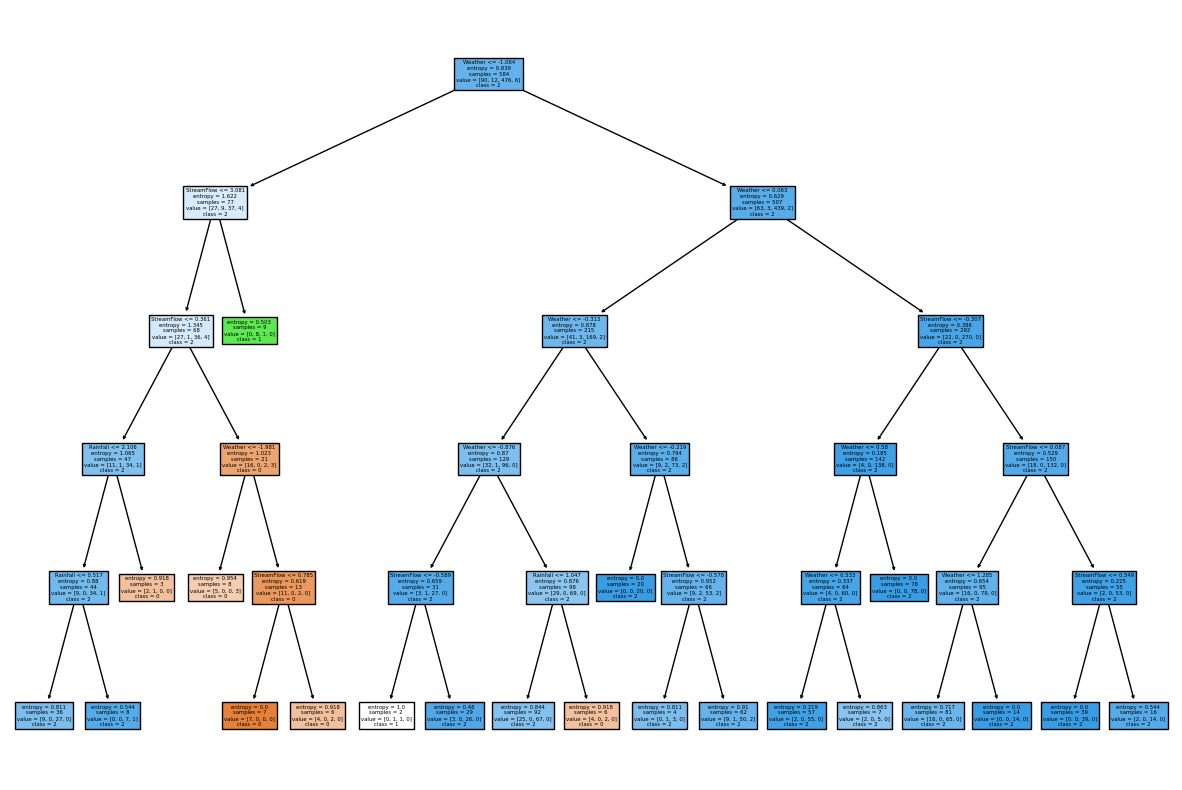

In [55]:
# Convert class names to strings
class_names_str = [str(class_name) for class_name in label_encoder.classes_]

# Visualize the best decision tree (optional)
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=class_names_str)
plt.show()

## Support Vector Machines (Classification)

In [56]:
from sklearn.svm import SVC

# Create a support vector machine model for classification
svm_classifier = SVC(random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_class_train)

# Predict on the test set
y_class_pred_svm = svm_classifier.predict(X_test)

## Random Forest (Classification)

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model for classification
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_class_train)

# Predict on the test set
y_class_pred_rf = rf_classifier.predict(X_test)

## Gradient Boosting (Classification)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosting model for classification
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_classifier.fit(X_train, y_class_train)

# Predict on the test set
y_class_pred_gb = gb_classifier.predict(X_test)

## XGBoost (Classification)

In [59]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_classification)))

# Train the model on the training set
xgb_classifier.fit(X_train, y_class_train)

# Predict on the test set
y_class_pred_xgb = xgb_classifier.predict(X_test)

8.0 Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,mean_squared_error

# Evaluate Decision Tree model
y_class_pred_dt = best_model.predict(X_test_scale)
accuracy_dt = accuracy_score(y_class_test, y_class_pred_dt)
classification_rep_dt = classification_report(y_class_test, y_class_pred_dt)
conf_matrix_dt = confusion_matrix(y_class_test, y_class_pred_dt)

print("Decision Tree Model Evaluation:")
print(f'Accuracy: {accuracy_dt:.4f}')
print('\nClassification Report:')
print(classification_rep_dt)
print('\nConfusion Matrix:')
print(conf_matrix_dt)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_class_test, y_class_pred_rf)
classification_rep_rf = classification_report(y_class_test, y_class_pred_rf)
conf_matrix_rf = confusion_matrix(y_class_test, y_class_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f'Accuracy: {accuracy_rf:.4f}')
print('\nClassification Report:')
print(classification_rep_rf)
print('\nConfusion Matrix:')
print(conf_matrix_rf)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_class_test, y_class_pred_svm)
classification_rep_svm = classification_report(y_class_test, y_class_pred_svm)
conf_matrix_svm = confusion_matrix(y_class_test, y_class_pred_svm)

print("\nSupport Vector Machine Model Evaluation:")
print(f'Accuracy: {accuracy_svm:.4f}')
print('\nClassification Report:')
print(classification_rep_svm)
print('\nConfusion Matrix:')
print(conf_matrix_svm)

# Evaluate Gradient Boosting model
accuracy_gb = accuracy_score(y_class_test, y_class_pred_gb)
classification_rep_gb = classification_report(y_class_test, y_class_pred_gb)
conf_matrix_gb = confusion_matrix(y_class_test, y_class_pred_gb)

print("\nGradient Boosting Model Evaluation:")
print(f'Accuracy: {accuracy_gb:.4f}')
print('\nClassification Report:')
print(classification_rep_gb)
print('\nConfusion Matrix:')
print(conf_matrix_gb)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_class_test, y_class_pred_xgb)
classification_rep_xgb = classification_report(y_class_test, y_class_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_class_test, y_class_pred_xgb)

print(f'XGBoost Classifier - Accuracy: {accuracy_xgb:.4f}')
print('\nClassification Report:')
print(classification_rep_xgb)
print('\nConfusion Matrix:')
print(conf_matrix_xgb)

Decision Tree Model Evaluation:
Accuracy: 0.8151

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.26      0.33        23
           1       1.00      0.20      0.33         5
           2       0.85      0.96      0.90       117
           3       0.00      0.00      0.00         1

    accuracy                           0.82       146
   macro avg       0.58      0.35      0.39       146
weighted avg       0.79      0.82      0.78       146


Confusion Matrix:
[[  6   0  17   0]
 [  1   1   3   0]
 [  5   0 112   0]
 [  1   0   0   0]]

Random Forest Model Evaluation:
Accuracy: 0.8288

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.26      0.36        23
           1       1.00      0.20      0.33         5
           2       0.84      0.97      0.90       117
           3       0.00      0.00      0.00         1

    accuracy                           0.83       

In [61]:
results = pd.DataFrame({
    'Model':['Decision Tree', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Score':[accuracy_dt, accuracy_svm, accuracy_rf, accuracy_gb,accuracy_xgb]})
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.828767,Random Forest
0.815068,Decision Tree
0.801370,Support Vector Machine
0.801370,Gradient Boosting
0.801370,XGBoost


Based on the table, it shows the accuracy scores for five different machine learning models: Random Forest, XGBoost, Support Vector Machine (SVM), Gradient Boosting, and Decision Tree. Among the models, we know that the highest accuracy is Random Forest with an accuracy of 82.88%, following by Decision Tree with an accuracy of 81.51%. SVM, XGBoost and Gradient Boosting score the same accuracy about 80.14%.

In [62]:
from sklearn.metrics import classification_report

# Create a DataFrame for Classification Report
classification_reports = []

# SVM
report_svm = classification_report(y_class_test, y_class_pred_svm, output_dict=True)
classification_reports.append({'Model': 'SVM', **report_svm['weighted avg']})

# Decision Tree
report_dt = classification_report(y_class_test, y_class_pred_dt, output_dict=True)
classification_reports.append({'Model': 'Decision Tree', **report_dt['weighted avg']})

# Random Forest
report_rf = classification_report(y_class_test, y_class_pred_rf, output_dict=True)
classification_reports.append({'Model': 'Random Forest', **report_rf['weighted avg']})

# Gradient Boosting
report_gb = classification_report(y_class_test, y_class_pred_gb, output_dict=True)
classification_reports.append({'Model': 'Gradient Boosting', **report_gb['weighted avg']})

# XGBoost
report_xgb = classification_report(y_class_test, y_class_pred_xgb, output_dict=True)
classification_reports.append({'Model': 'XGBoost', **report_xgb['weighted avg']})


# Create DataFrame
classification_df = pd.DataFrame(classification_reports)
classification_df = classification_df.set_index('Model')

# Sort DataFrame by Score in descending order
classification_df = classification_df.sort_values(by='f1-score', ascending=False)

# Print the DataFrame
print(classification_df)

                   precision    recall  f1-score  support
Model                                                    
Random Forest       0.805479  0.828767  0.793750    146.0
Decision Tree       0.786905  0.815068  0.784838    146.0
XGBoost             0.769780  0.801370  0.780900    146.0
Gradient Boosting   0.767914  0.801370  0.776067    146.0
SVM                 0.662671  0.801370  0.722114    146.0


Precision is concerned with positive forecast accuracy, recall is concerned with recording every true instance of success, and the F1-score achieves equilibrium between recall and accuracy. Overall, Random Forest got the highest precision, recall, and F1-score among the five models listed, with 0.81, 0.83, and 0.79, respectively. Meanwhile, SVM has the lowest precision and F1-score with 0.66 and 0.72, respectively.

9.0 ROC Curve

                        AUC
Model                      
XGBoost            0.767977
Random Forest      0.752685
Gradient Boosting  0.729542
SVM                0.626958
Decision Tree      0.587532


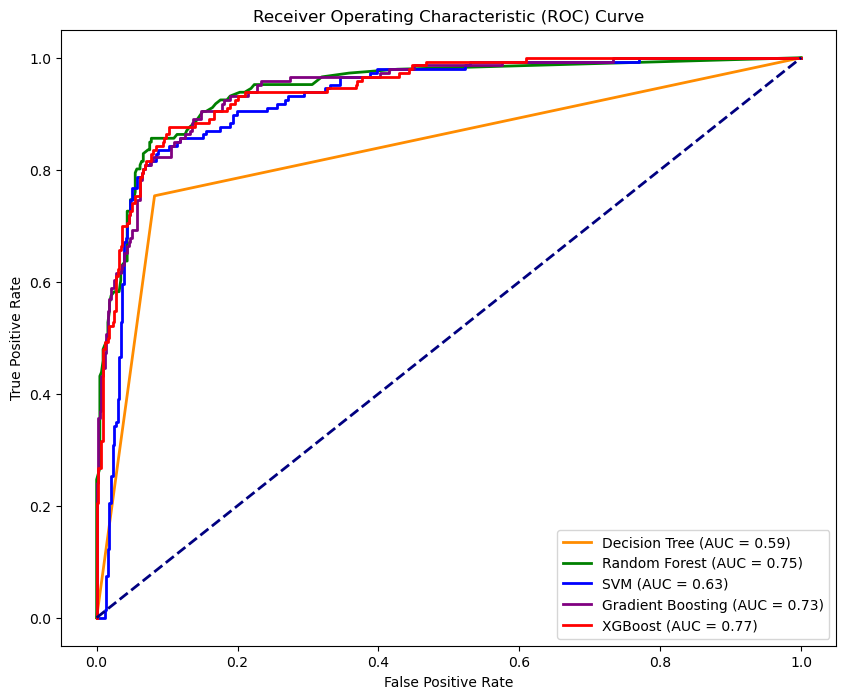

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_class_train)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_class_train)

# Support Vector Machine (SVM)
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_class_train)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_class_train)

# XGBoost
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_class_train)

# Binarize the labels
y_test_bin = label_binarize(y_class_test, classes=dt_classifier.classes_)

# Decision Tree
y_dt_probs = dt_classifier.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test_bin, y_dt_probs, multi_class='ovr')
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_bin.ravel(), y_dt_probs.ravel())

# Random Forest
y_rf_probs = rf_classifier.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test_bin, y_rf_probs, multi_class='ovr')
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_bin.ravel(), y_rf_probs.ravel())

# Support Vector Machine (SVM)
y_svm_probs = svm_classifier.predict_proba(X_test)
roc_auc_svm = roc_auc_score(y_test_bin, y_svm_probs, multi_class='ovr')
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_bin.ravel(), y_svm_probs.ravel())

# Gradient Boosting
y_gb_probs = gb_classifier.predict_proba(X_test)
roc_auc_gb = roc_auc_score(y_test_bin, y_gb_probs, multi_class='ovr')
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_bin.ravel(), y_gb_probs.ravel())

# XGBoost
y_xgb_probs = xgb_classifier.predict_proba(X_test)
roc_auc_xgb = roc_auc_score(y_test_bin, y_xgb_probs, multi_class='ovr')
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_bin.ravel(), y_xgb_probs.ravel())

# Create a dictionary to store AUC values
auc_results = {
    'Decision Tree': roc_auc_dt,
    'Random Forest': roc_auc_rf,
    'SVM': roc_auc_svm,
    'Gradient Boosting': roc_auc_gb,
    'XGBoost': roc_auc_xgb
}

# Create DataFrame
auc_df = pd.DataFrame(list(auc_results.items()), columns=['Model', 'AUC'])
auc_df = auc_df.set_index('Model')

# Sort DataFrame by AUC in descending order
auc_df = auc_df.sort_values(by='AUC', ascending=False)

# Print the DataFrame
print(auc_df)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Based on the graph above it showed the performance of Receiver Operating Characteristics (ROC). XGBoost has the highest Area Under the Curve (AUC) value at 0.77, indicating the most outstanding performance. At the same time, the lowest AUC is the decision tree, with only 0.59. The AUC values quantify the ability of each model to differentiate between classes. A model's performance improves as the AUC value increases. In general, the ROC curve shows that XGBoost outperforms Random Forest and Gradient Boosting as the most effective model for this task. SVM and Decision Tree exhibit comparatively lower accuracy in differentiating true positives from false positives.

10.0 MSE & RMSE

In [64]:
# Create a DataFrame for MSE and RMSE
mse_rmse_results = []

# SVM
mse_svm = mean_squared_error(y_class_test, y_class_pred_svm)
rmse_svm = sqrt(mse_svm)
mse_rmse_results.append({'Model': 'SVM', 'MSE': mse_svm, 'RMSE': rmse_svm})

# Decision Tree
mse_dt = mean_squared_error(y_class_test, y_class_pred_dt)
rmse_dt = sqrt(mse_dt)
mse_rmse_results.append({'Model': 'Decision Tree', 'MSE': mse_dt, 'RMSE': rmse_dt})

# Random Forest
mse_rf = mean_squared_error(y_class_test, y_class_pred_rf)
rmse_rf = sqrt(mse_rf)
mse_rmse_results.append({'Model': 'Random Forest', 'MSE': mse_rf, 'RMSE': rmse_rf})

# Gradient Boosting
mse_gb = mean_squared_error(y_class_test, y_class_pred_gb)
rmse_gb = sqrt(mse_gb)
mse_rmse_results.append({'Model': 'Gradient Boosting', 'MSE': mse_gb, 'RMSE': rmse_gb})

# XGBoost
mse_xgb = mean_squared_error(y_class_test, y_class_pred_xgb)
rmse_xgb = sqrt(mse_xgb)
mse_rmse_results.append({'Model': 'XGBoost', 'MSE': mse_xgb, 'RMSE': rmse_xgb})

# Create DataFrame
mse_rmse_df = pd.DataFrame(mse_rmse_results)
mse_rmse_df = mse_rmse_df.set_index('Model')

# Sort DataFrame by MSE in ascending order
mse_rmse_df = mse_rmse_df.sort_values(by='MSE', ascending=True)

# Print the DataFrame
print(mse_rmse_df)

                        MSE      RMSE
Model                                
Random Forest      0.582192  0.763015
Gradient Boosting  0.650685  0.806650
SVM                0.671233  0.819288
Decision Tree      0.691781  0.831734
XGBoost            0.726027  0.852072


The table above shows the performance of Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). Among the models provided, the Random Forest stands out as the top performer due to its much lower MSE and RMSE values, with 0.58 and 0.76, respectively. With the greatest values of MSE and RMSE, the XGBoost is the least effective of those that were provided with the MSE is 0.73 and RMSE is 0.85. The error rates are an indication of each model's prediction accuracy with regard to the objective variable. The model's performance increases as the error rate drops.

# Save the model

In [65]:
import joblib

# Save Decision Tree model
joblib.dump(dt_classifier, 'decision_tree_model.pkl')

# Save Random Forest model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

# Save SVM model
joblib.dump(svm_classifier, 'svm_model.pkl')

# Save Gradient Boosting model
joblib.dump(gb_classifier, 'gradient_boosting_model.pkl')

# Save XGBoost model
joblib.dump(xgb_classifier, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [66]:
# Load Decision Tree model
loaded_dt_model = joblib.load('decision_tree_model.pkl')

# Load Random Forest model
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Load SVM model
loaded_svm_model = joblib.load('svm_model.pkl')

# Load Gradient Boosting model
loaded_gb_model = joblib.load('gradient_boosting_model.pkl')

# Load XGBoost model
loaded_xgb_model = joblib.load('xgboost_model.pkl')